In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns

In [92]:
#reading the data 
df = pd.read_excel("Cereals.xls")
df.head()
df.set_index(df.name)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,,
100%_Natural_Bran,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
All-Bran,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
Almond_Delight,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
Apple_Cinnamon_Cheerios,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Triples,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
Trix,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
Wheat_Chex,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445


In [93]:
#metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     int64  
 10  potass    76 non-null     int64  
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.6+ KB


In [94]:
#Question 1-Tabulating mfr and types
pd.crosstab(df.mfr,df.type)

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


In [95]:
#Question 2- 5 number summary before preprocessing
l = ["calories", "protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]
df[l].describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [96]:
#Question 3 - find missing values and replace with mean
mean = df[l].mean()
df = df.mask(df == -1).fillna(mean)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541


In [97]:
#Question 4 - find and replace outliers with median
q1 = df[l].quantile(q=0.25)
q3 = df[l].quantile(q=0.75)
iqr = q3 - q1
a = q1 - (1.5 * iqr)
b = q3 + (1.5 * iqr)
median = df[l].median()
df = df.mask(df > b).fillna(median)
df = df.mask(df < a).fillna(median)
df.head()

C:\Users\ragas\AppData\Local\Temp\ipykernel_11364\2287106521.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df.mask(df > b).fillna(median)
C:\Users\ragas\AppData\Local\Temp\ipykernel_11364\2287106521.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df.mask(df < a).fillna(median)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120.0,3.0,5,15.0,2.00,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,110.0,4.0,1,260.0,1.75,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110.0,4.0,0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110.0,2.0,2,200.0,1.00,14.0,8.0,93.657895,25.0,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110.0,2.0,2,180.0,1.50,10.5,10.0,70.000000,25.0,1,1.0,0.75,29.509541


In [98]:
#Question 5 - compare 5 number summary of before and after processing
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.236842,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,25.0,2.197368,1.030000,0.827500,42.327057
std,8.099166,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,0.0,0.832982,0.151438,0.227204,13.820602
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.500000,1.500000,93.704912


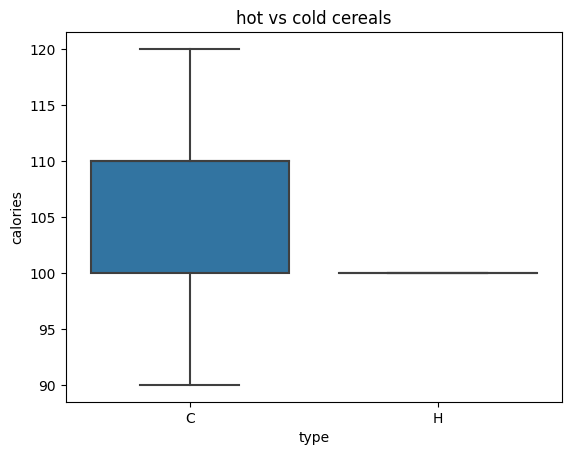

In [99]:
#Question 6 - side by side boxplot of calories of hot vs cold cereals
sns.boxplot(x="type",y="calories",data=df)
plt.title("hot vs cold cereals")
plt.show()

In [100]:
#Question 7 - are the calories and consumer rating correlated
from scipy.stats import pearsonr
corr,p = pearsonr(df.calories,df.rating)

print("correlation :",corr)
print("p value",p)

correlation : -0.520763638976708
p value 1.4178255416042877e-06


In [101]:
#Question 8 - are mfr and consumer rating correlated
from scipy.stats import chi2_contingency
x = np.array(df.mfr)
y = np.array(df.rating)

cont_tab = pd.crosstab(x,y)

chi2, p, dof, expected = chi2_contingency(cont_tab)

print("Chi-squared Statistic: ", chi2)
print('p value',p)
if p > 0.05:
    print('not correlated')
else:
    print('correlated')



Chi-squared Statistic:  456.0
p value 0.4124224260799003
not correlated


In [102]:
#Question 9-which is the best vs worst cereal in terms of user rating 
print("Best cereal :" ,df.loc[df["rating"].idxmax(),"name"])
print("Worst cereal :" ,df.loc[df["rating"].idxmin(),"name"])

Best cereal : All-Bran_with_Extra_Fiber
Worst cereal : Cap'n'Crunch


In [103]:
#Question 10 - which is the best vs worst cereal in terms of calories
print("Best cereal :" ,df.loc[df["calories"].idxmin(),"name"])
print("Worst cereal :" ,df.loc[df["calories"].idxmax(),"name"])

Best cereal : Bran_Chex
Worst cereal : 100%_Natural_Bran


In [104]:
#Question 11 - Rate the top 5 cereals in terms of user rating
df2=df.sort_values(by="rating",ascending=False)
df2.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
2,All-Bran_with_Extra_Fiber,K,C,110.0,4.0,0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.00,0.50,93.704912
63,Shredded_Wheat_'n'Bran,N,C,90.0,3.0,0,180.0,4.00,19.0,0.0,140.000000,25.0,1,1.00,0.67,74.472949
64,Shredded_Wheat_spoon_size,N,C,90.0,3.0,0,180.0,3.00,20.0,0.0,120.000000,25.0,1,1.00,0.67,72.801787
62,Shredded_Wheat,N,C,110.0,2.0,0,180.0,3.00,16.0,0.0,95.000000,25.0,1,0.83,1.00,68.235885
19,Cream_of_Wheat_(Quick),N,H,100.0,3.0,0,80.0,1.00,21.0,0.0,93.657895,25.0,2,1.00,1.00,64.533816


In [105]:
#Question 12 - find the cereal with the highest sodium content
print("Highest sodium:" ,df.loc[df['sodium'].idxmax(),"name"])

Highest sodium: Product_19


In [110]:
#Question 13-Identify the cereal with the lowest carbohydrate.

df['carbo'] = df['carbo'].astype(float)

print("Lowest carbohydrates:" ,df.loc[df['carbo'].idxmin(),"name"])

Lowest carbohydrates: All-Bran


In [107]:
#Question 14-Are variable shelf and sugar correlated
cont_tab = pd.crosstab(df.shelf,df.sugars)

chi2, p, dof, expected = chi2_contingency(cont_tab)

print("Chi-squared Statistic: ", chi2)
print('p value',p)
if p > 0.05:
    print('not correlated')
else:
    print('correlated')



Chi-squared Statistic:  46.310486656200936
p value 0.04883649320316999
correlated


In [111]:
#Question 15-Identify the manufacturer of the cereals with the highest cereal 

df['sugars'] = df['sugars'].astype(float)
print("manufacturer:" ,df.loc[df['sugars'].idxmin(),"mfr"])

manufacturer: K
